In [1]:
#Exploration of New product - September 2021
#Section with PCs and with Levels
import datetime as dt 
import glob
import netCDF4 as nc
import numpy as np
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import cmocean
import gsw

import yaml

import sklearn
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import xarray as xr
import numpy as np
import pandas as pd



import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
cartopy.config["data_dir"] = './cartopy_shapefiles'

os.getcwd()
pathMon = '/home/datawork-lops-bluecloud/osnet/grilled_Nordic_Sea/'
pathfig = '/home/datawork-lops-bluecloud/osnet/grilled_Nordic_Sea/figures/'

In [2]:
with open(r'configuration.yaml') as file:
    configuration = yaml.load(file, Loader=yaml.FullLoader)

    print("File version: ", configuration["version"])

File version:  0.1


In [3]:
%%time
#Plot section with longitude fixed
#Test on the product for 2016 January 01
t = '1993-01-01'
yy = t[0:4]
mm = t[5:7]
dd = t[8:10]

ds = xr.open_dataset(pathMon + "produit_199301.nc")
ds.load()

CPU times: user 16 ms, sys: 124 ms, total: 140 ms
Wall time: 547 ms


<xarray.Dataset>
Dimensions:             (time: 31, lat: 32, lon: 100, DEPTH: 51)
Coordinates:
    mask                (time, lat, lon) float64 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0
  * DEPTH               (DEPTH) int64 0 1 2 3 4 5 6 ... 628 697 773 857 950 1000
  * time                (time) datetime64[ns] 1993-01-01 ... 1993-01-31
  * lat                 (lat) float64 69.12 69.38 69.62 ... 76.38 76.62 76.88
  * lon                 (lon) float64 -19.88 -19.62 -19.38 ... 4.375 4.625 4.875
Data variables: (12/17)
    SLA                 (time, lat, lon) float32 -0.031 -0.0286 ... -0.0605
    UGOS                (time, lat, lon) float32 -0.0263 -0.0258 ... -0.0129
    VGOS                (time, lat, lon) float32 -0.0532 -0.0446 ... 0.072
    UGOSA               (time, lat, lon) float32 -0.0074 -0.0102 ... -0.0056
    VGOSA               (time, lat, lon) float32 0.0165 0.0184 ... 0.0491 0.0496
    SLA_err             (time, lat, lon) float32 0.0129 0.0127 ... 0.0176 0.0167
    ...                  ...
    PSAL_predicted      (DEPTH, time, lat, lon) float32 34.76 34.8 ... 34.9 34.9
    TEMP_predicted      (DEPTH, time, lat, lon) float32 0.1063 ... -0.5864
    PSAL_predicted_std  (DEPTH, time, lat, lon) float32 0.04211 ... 0.006354
    TEMP_predicted_std  (DEPTH, time, lat, lon) float32 0.1602 0.1484 ... 0.1469
    MLD_mask            (DEPTH, time, lat, lon) float32 2.49e-07 ... 0.8107
    SIG_predicted       (DEPTH, time, lat, lon) float64 27.91 27.93 ... 28.06

### Plot profil 

In [4]:
n = 0

ds_time = ds.isel(time=n)
ds_time_lat = ds_time.isel(lat=n)
dss = ds_time_lat.isel(lon=n)

In [6]:
#GLORYS12

ds_glorys12 = xr.open_dataset("/home/ref-ocean-reanalysis/global-reanalysis-phy-001-030-daily/1993/01/mercatorglorys12v1_gl12_mean_19930101_R19930106.nc")
ds_glorys_selected = ds_glorys12.sel(time=dss['time'].data, longitude=dss['lon'].data, latitude=dss['lat'].data, method='nearest')
ds_glorys_clean = ds_glorys_selected.where(ds_glorys12.depth < 1100)



In [7]:
# ARMOR3D

ds_Armor3D_selected = xr.open_dataset("/home/ref-cmems-public/tac/multiobs/MULTIOBS_GLO_PHY_REP_015-002/ARMOR3D/data/1993/dataset-armor-3d-rep-weekly_19930106T1200Z_P20190301T0000Z.nc")

ds_Armor3D_selected_lon = ds_Armor3D_selected.assign_coords(lon180=(((ds_Armor3D_selected.longitude + 180) % 360) - 180))  
ds_Armor3D_selected_lon['longitude'] = ds_Armor3D_selected_lon.lon180

ds_Armor3D_selected_lon = ds_Armor3D_selected_lon.sortby('longitude')


ds_Armor3D_selected_lon_spot = ds_Armor3D_selected_lon.sel(time=dss['time'].data, longitude=dss['lon'].data, latitude=dss['lat'].data, method='nearest')


ds_Armor3D_selected_lon_area_clean = ds_Armor3D_selected_lon_spot.where(ds_Armor3D_selected.depth < 1100)
ds_Armor3D_selected

<xarray.Dataset>
Dimensions:    (time: 1, depth: 33, latitude: 689, longitude: 1440)
Coordinates:
  * time       (time) datetime64[ns] 1993-01-06
  * depth      (depth) int16 0 10 20 30 50 75 ... 3000 3500 4000 4500 5000 5500
  * latitude   (latitude) float32 -82.12 -81.88 -81.62 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
Data variables:
    so         (time, depth, latitude, longitude) float32 ...
    to         (time, depth, latitude, longitude) float32 ...
    ugo        (time, depth, latitude, longitude) float32 ...
    vgo        (time, depth, latitude, longitude) float32 ...
    zo         (time, depth, latitude, longitude) float32 ...
    mlotst     (time, latitude, longitude) float32 ...
Attributes:
    description:  ARMOR3D REP CMEMS - April 2019 Release
    title:        ARMOR3D REP - TSHUVMld Global Ocean Observation-based Product
    Conventions:  CF-1.0
    institution:  CLS
    domain_name:  GLO
    history:      2019-02-21 10:18:53 ARMOR3D REP - Weekly TSHUVMld Global Oc...

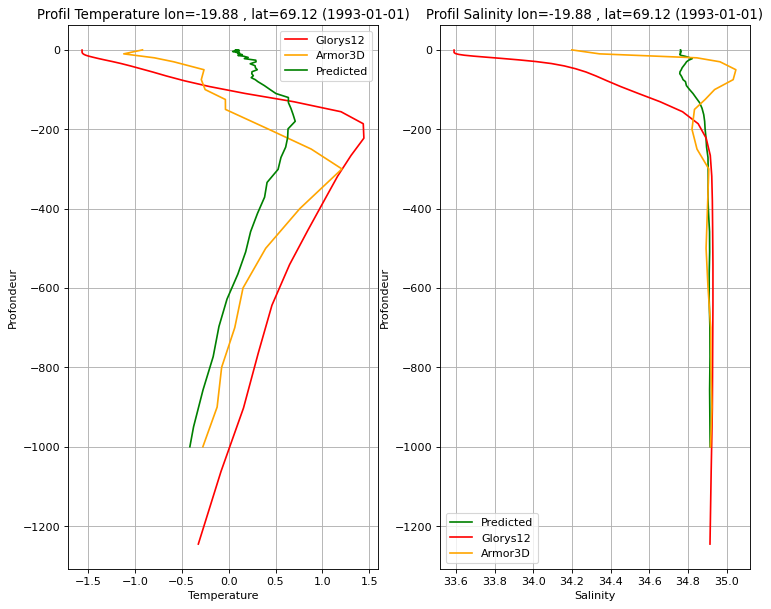

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11,9), dpi=80, facecolor='w', edgecolor='k')

# --------------------- ax 


ax[0].plot(ds_glorys_selected['thetao'], -ds_glorys_selected['depth'], label='Glorys12',c = 'red')
ax[0].plot(ds_Armor3D_selected_lon_area_clean['to'], -ds_Armor3D_selected_lon_area_clean['depth'], label='Armor3D',c = 'orange')
ax[0].plot(dss['TEMP_predicted'], -dss['DEPTH'], label='Predicted',c = 'green')

ax[0].set_title('Profil Temperature lon=' + str(np.around(dss.lon.data, decimals=2)) + ' , lat=' + str(np.around(dss.lat.data, decimals=2)) + 
                ' (' + str(pd.to_datetime(dss.time.data).date()) + ')')
ax[0].grid()

# --------------------- ax 1

ax[1].plot(dss['PSAL_predicted'], -dss['DEPTH'], label='Predicted',c = 'green')
ax[1].plot(ds_glorys_selected['so'], -ds_glorys_selected['depth'], label='Glorys12',c = 'red')
ax[1].plot(ds_Armor3D_selected_lon_area_clean['so'], -ds_Armor3D_selected_lon_area_clean['depth'], label='Armor3D',c = 'orange')
ax[1].grid()

ax[1].set_title('Profil Salinity lon=' + str(np.around(dss.lon.data, decimals=2)) + ' , lat=' + str(np.around(dss.lat.data, decimals=2)) + 
                ' (' + str(pd.to_datetime(dss.time.data).date()) + ')')


plt.setp(ax[0], xlabel='Temperature')
plt.setp(ax[1], xlabel='Salinity')

plt.setp(ax[0 : 2], ylabel='Profondeur')

leg = ax[0].legend();
leg = ax[1].legend();
